In [4]:
!pip install graphviz

C:\Users\BANTI\AppData\Local\Temp\ipykernel_32364\1139016176.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['receiver'].fillna('Unknown', inplace=True)
C:\Users\BANTI\AppData\Local\Temp\ipykernel_32364\1139016176.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Cross-validation scores: [0.98723094 0.98668369 0.98376209 0.9826674  0.98777595]
Mean CV score: 0.9856
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 98.91%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5198
           1       0.99      0.99      0.99      6549

    accuracy                           0.99     11747
   macro avg       0.99      0.99      0.99     11747
weighted avg       0.99      0.99      0.99     11747



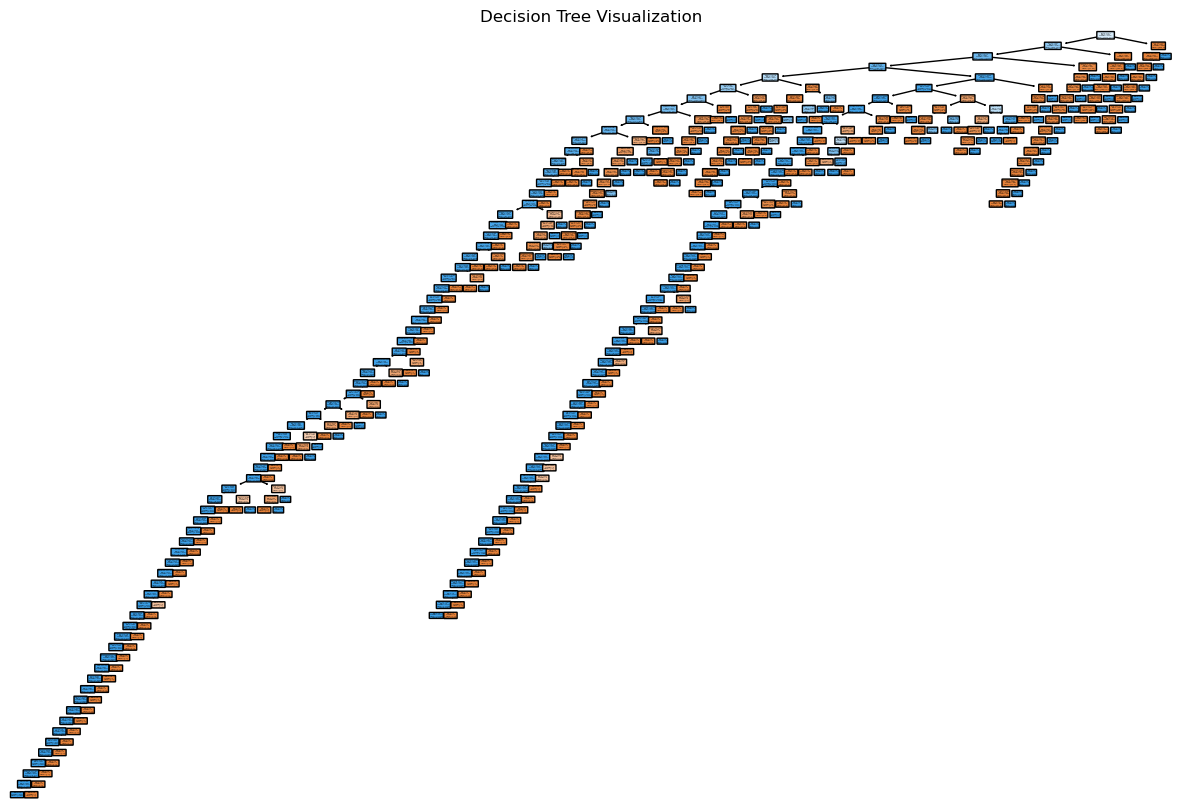

In [7]:
# If the necessary packages are not installed, uncomment and run the following lines:
# !pip install pandas scikit-learn graphviz
# !apt-get install graphviz

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

# Load the dataset
data = pd.read_csv('CEAS_08.csv')

# Step 1: Handle missing values
data['receiver'].fillna('Unknown', inplace=True)
data['subject'].fillna('No Subject', inplace=True)

# Step 2: Feature engineering with TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(data['subject'] + ' ' + data['body'])
y = data['label']

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 4: Train a Decision Tree model with cross-validation
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = best_tree.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report_output)

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(15,10))
tree_plot = tree.plot_tree(best_tree, 
                            feature_names=tfidf.get_feature_names_out(), 
                            class_names=['Not Spam', 'Spam'], 
                            filled=True, 
                            rounded=True)

plt.title("Decision Tree Visualization")
plt.show()
